In [2]:
import interferometer as ir
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set default plot line color cycling
plt.rcParams.update(plt.rcParamsDefault)
ccycle = mpl.cycler('color', plt.cm.rainbow(np.linspace(0.1, 2.9, 30)))
plt.rc('axes', prop_cycle = ccycle)

# Allow fancy axis number formatting
from matplotlib.ticker import EngFormatter, ScalarFormatter

# Set stylesheet for plots
plt.style.use("seaborn-pastel")
mpl.style.use('bmh')
#mpl.style.use("seaborn-poster")
#mpl.style.use("seaborn-pastel")
#mpl.style.use("seaborn-muted")
#mpl.style.use("seaborn-darkgrid")
#mpl.style.use("ggplot")

# Optical Metrology with Leaky Polarizers

G. Nutt (wrote code), J. Dressel (compiled examples and plotting code)

## Definitions

In [3]:
def make_plots(t1, t3, t2min, t2max, ymax=None):
    """Show stacked horizontal, vertical, and split intensity plots for selected angle ranges.
    
    Parameters:
    -----------
        t1 : float
            rotation angle of 1st half wave plate in clockwise direction
        t3 : float
            rotation angle of 3rd half wave plate in clockwise direction
        t2min : float
             minimum angle to show for the middle imperfect polarizer
        t2max : float
             maximum angle to show for the middle imperfect polarizer
    
    Keyword Arguments:
    ------------------
        ymax : float (None)
            if defined, set vertical axis of intensity plot
    """
    
    # Dark-port polarization intensities
    t2s, h = ir.intensity(t1,t3,0,t2min,t2max)
    _  , v = ir.intensity(t1,t3,90,t2min,t2max)
    
    # Split-detected signal
    s = (h - v)/(h + v)
    
    # Set up plot axes
    fig, axes = plt.subplots(2, sharex=True, figsize=(6,7), dpi=300)
    plt.rc('font', family='serif')
    axes[0].set_prop_cycle(ccycle)
    
    # Upper Plot (intensities)
    axes[0].grid(True)
    axes[0].plot(t2s, h, label="H")
    axes[0].plot(t2s, v, label="V")
    axes[0].plot(t2s, np.zeros_like(t2s), color="black")
    # Format axis ticks nicely
    formatter0 = EngFormatter(places=2, sep="\N{THIN SPACE}", usetex=True, unit="")
    axes[0].yaxis.set_major_formatter(formatter0)
    axes[0].set_title("Dark Port Polarization Intensities")
    axes[0].set_ylabel(r"Intensity Fraction: $I/I_0$")
    # Label curves in plot
    axes[0].legend()
    # Annotate extra information
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    axes[0].text(0.87, 0.75, r"$\theta_1 = ${}$^\circ$".format(t1), ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.65, r"$\theta_3 = ${}$^\circ$".format(t3), ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.55, r"$\mathrm{P}_{\mathrm{in}} = \mathrm{H}$", ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.45, r"$\eta^2_{\mathrm{leak}} = 1\%$", ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    if ymax:  # Set y limit only if requested
        axes[0].set_ylim(0, ymax)
        
    # Lower Plot (split-detection)
    axes[1].plot(t2s, s)
    # include reference horizontal lines
    axes[1].plot(t2s, np.zeros_like(t2s), color="gray", linestyle="--", linewidth=1)
    axes[1].plot(t2s, np.ones_like(t2s), color="black", linewidth=1)
    axes[1].plot(t2s, -np.ones_like(t2s), color="black", linewidth=1)
    axes[1].grid(True)
    axes[1].set_title("Normalized Split-Detected Signal")
    axes[1].set_xlabel(r"Polarizer Rotation Angle: $\theta\;[^\circ]$")
    axes[1].set_ylabel(r"Signal: $S(\theta) = (I_H - I_V)/(I_H + I_V)$")
    # Format label ticks nicely
    formatter1 = EngFormatter(places=2, sep="", useMathText=True, unit="")
    formatter2 = ScalarFormatter(useMathText=True)
    axes[1].xaxis.set_major_formatter(formatter1)
    axes[1].yaxis.set_major_formatter(formatter2)
    axes[1].set_ylim(-1.05,1.05)
    fig.tight_layout()
    fig.align_ylabels(axes[:])
    plt.show()

## Basic Mechanism

The loss of the polarizers allow the zeroes of full destructive interference to shift closer together. Without loss they would be fixed at an angle of $\pi$ apart. Here we set the leakage of incorrect polarization (at the two PBS V reflections and the central rotating polarizer) to a modest value of 1% leakage ($\eta = 0.1$, $\eta^2 = 0.01 = 1\%$).

By shifting two zeroes near each other, the difference in intensity near those zeroes can vary rapidly. Each intensity signal by itself still varies smoothly on the scale of 10's of degrees, but the difference signal can span its full range from -1 to 1 with sub-degree sensitivity.

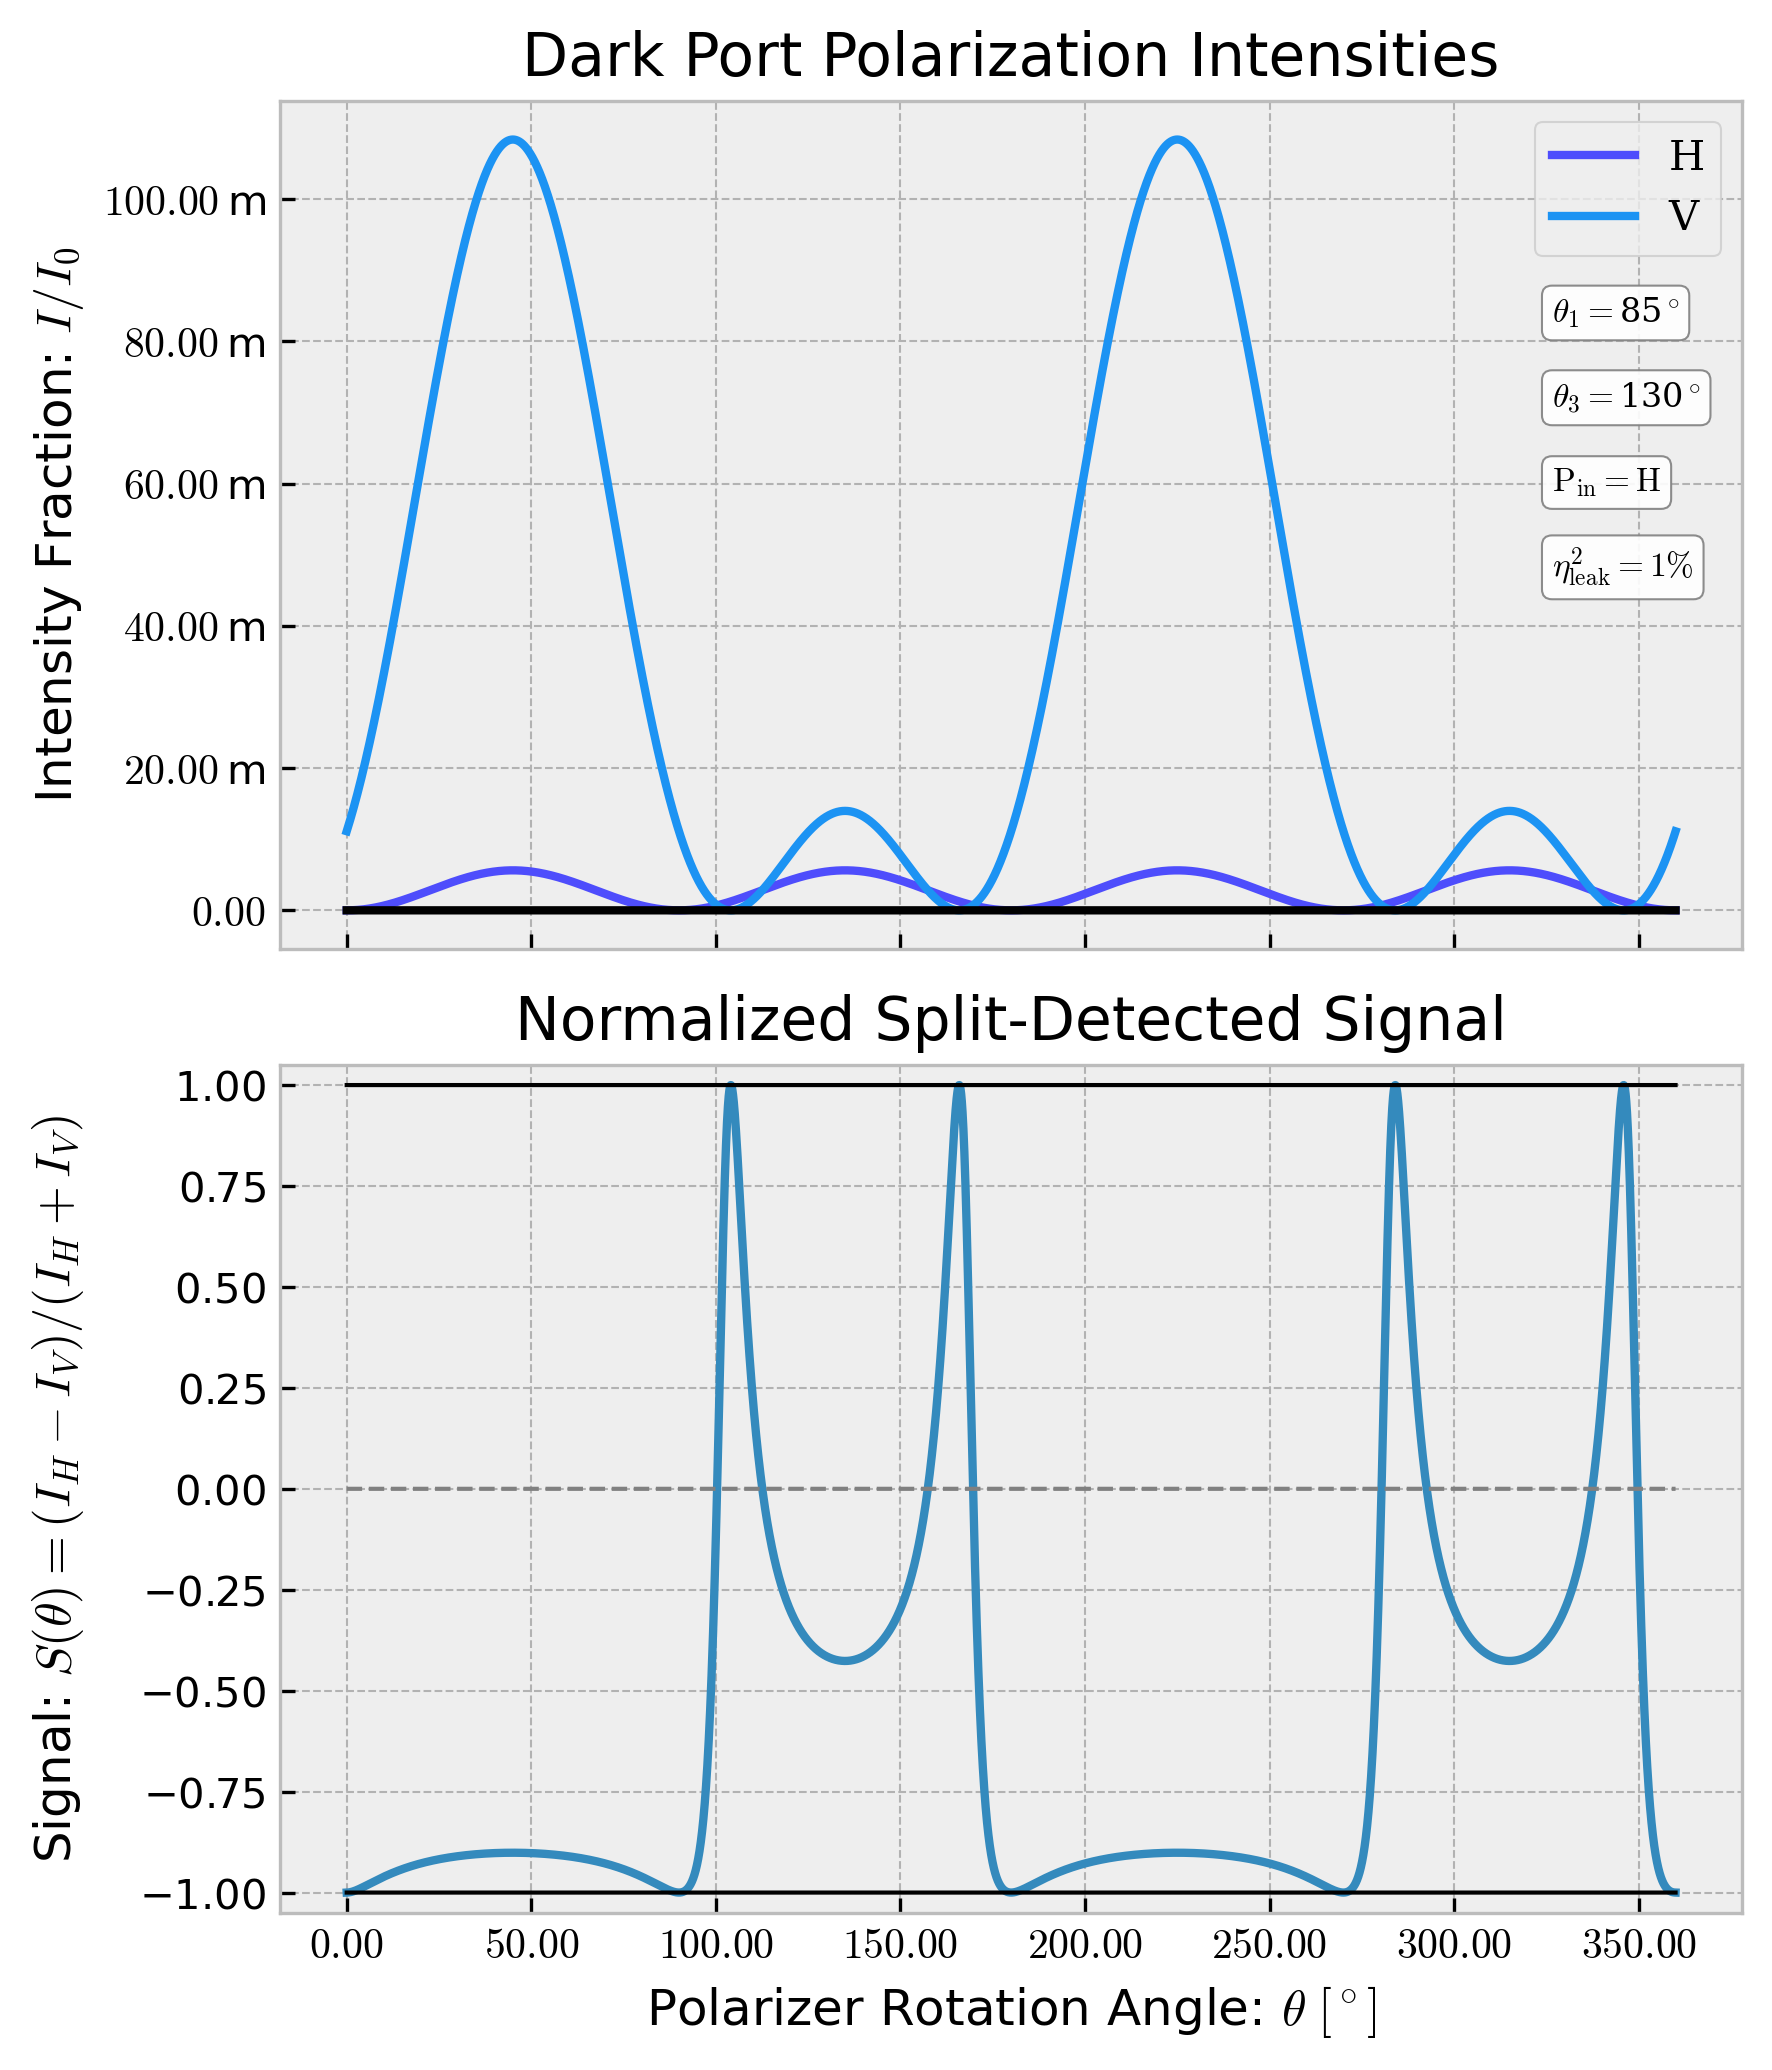

In [4]:
make_plots(85,130,0,360)

Zooming in to the double-peak region shows the steep curve where the staggered zeroes of H and V are located.

A consequence of this correspondence is that the steeper the curve is made, the lower the light intensity at each port.

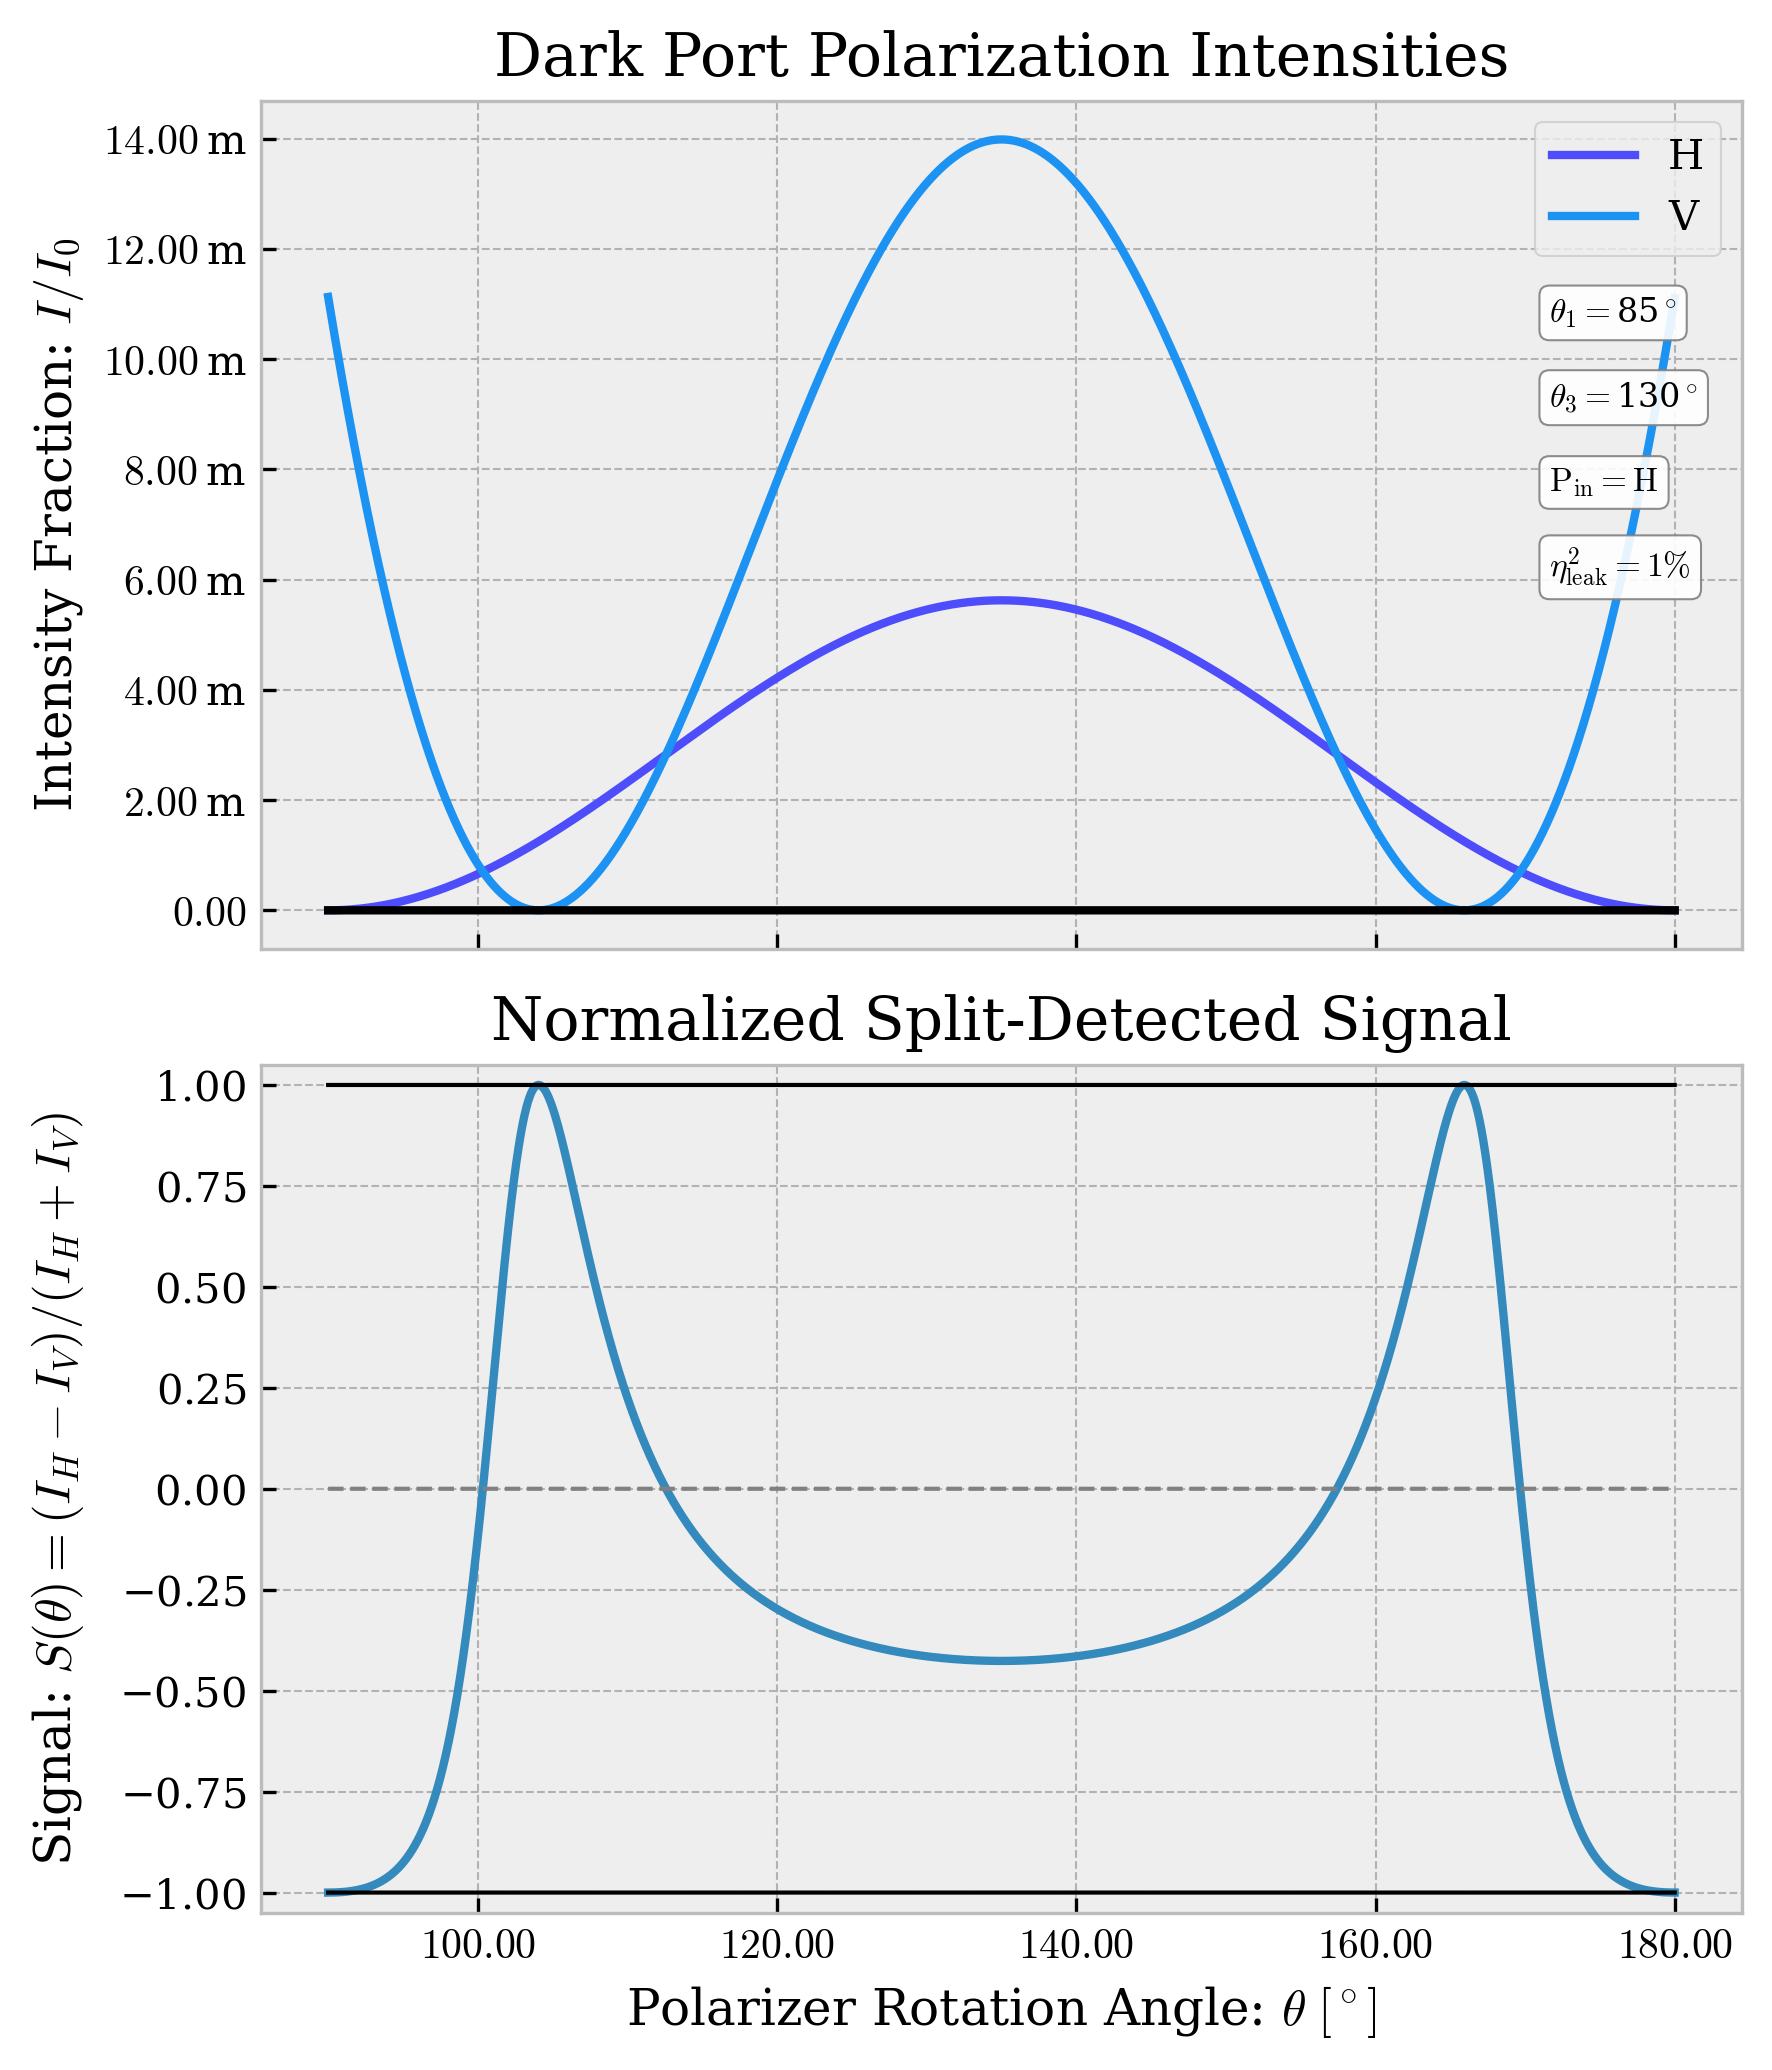

In [5]:
make_plots(85,130,90,180)

For this 8 degree range of signal linear response, the input light intensity has been attenuated by a factor of just over $10^3$.

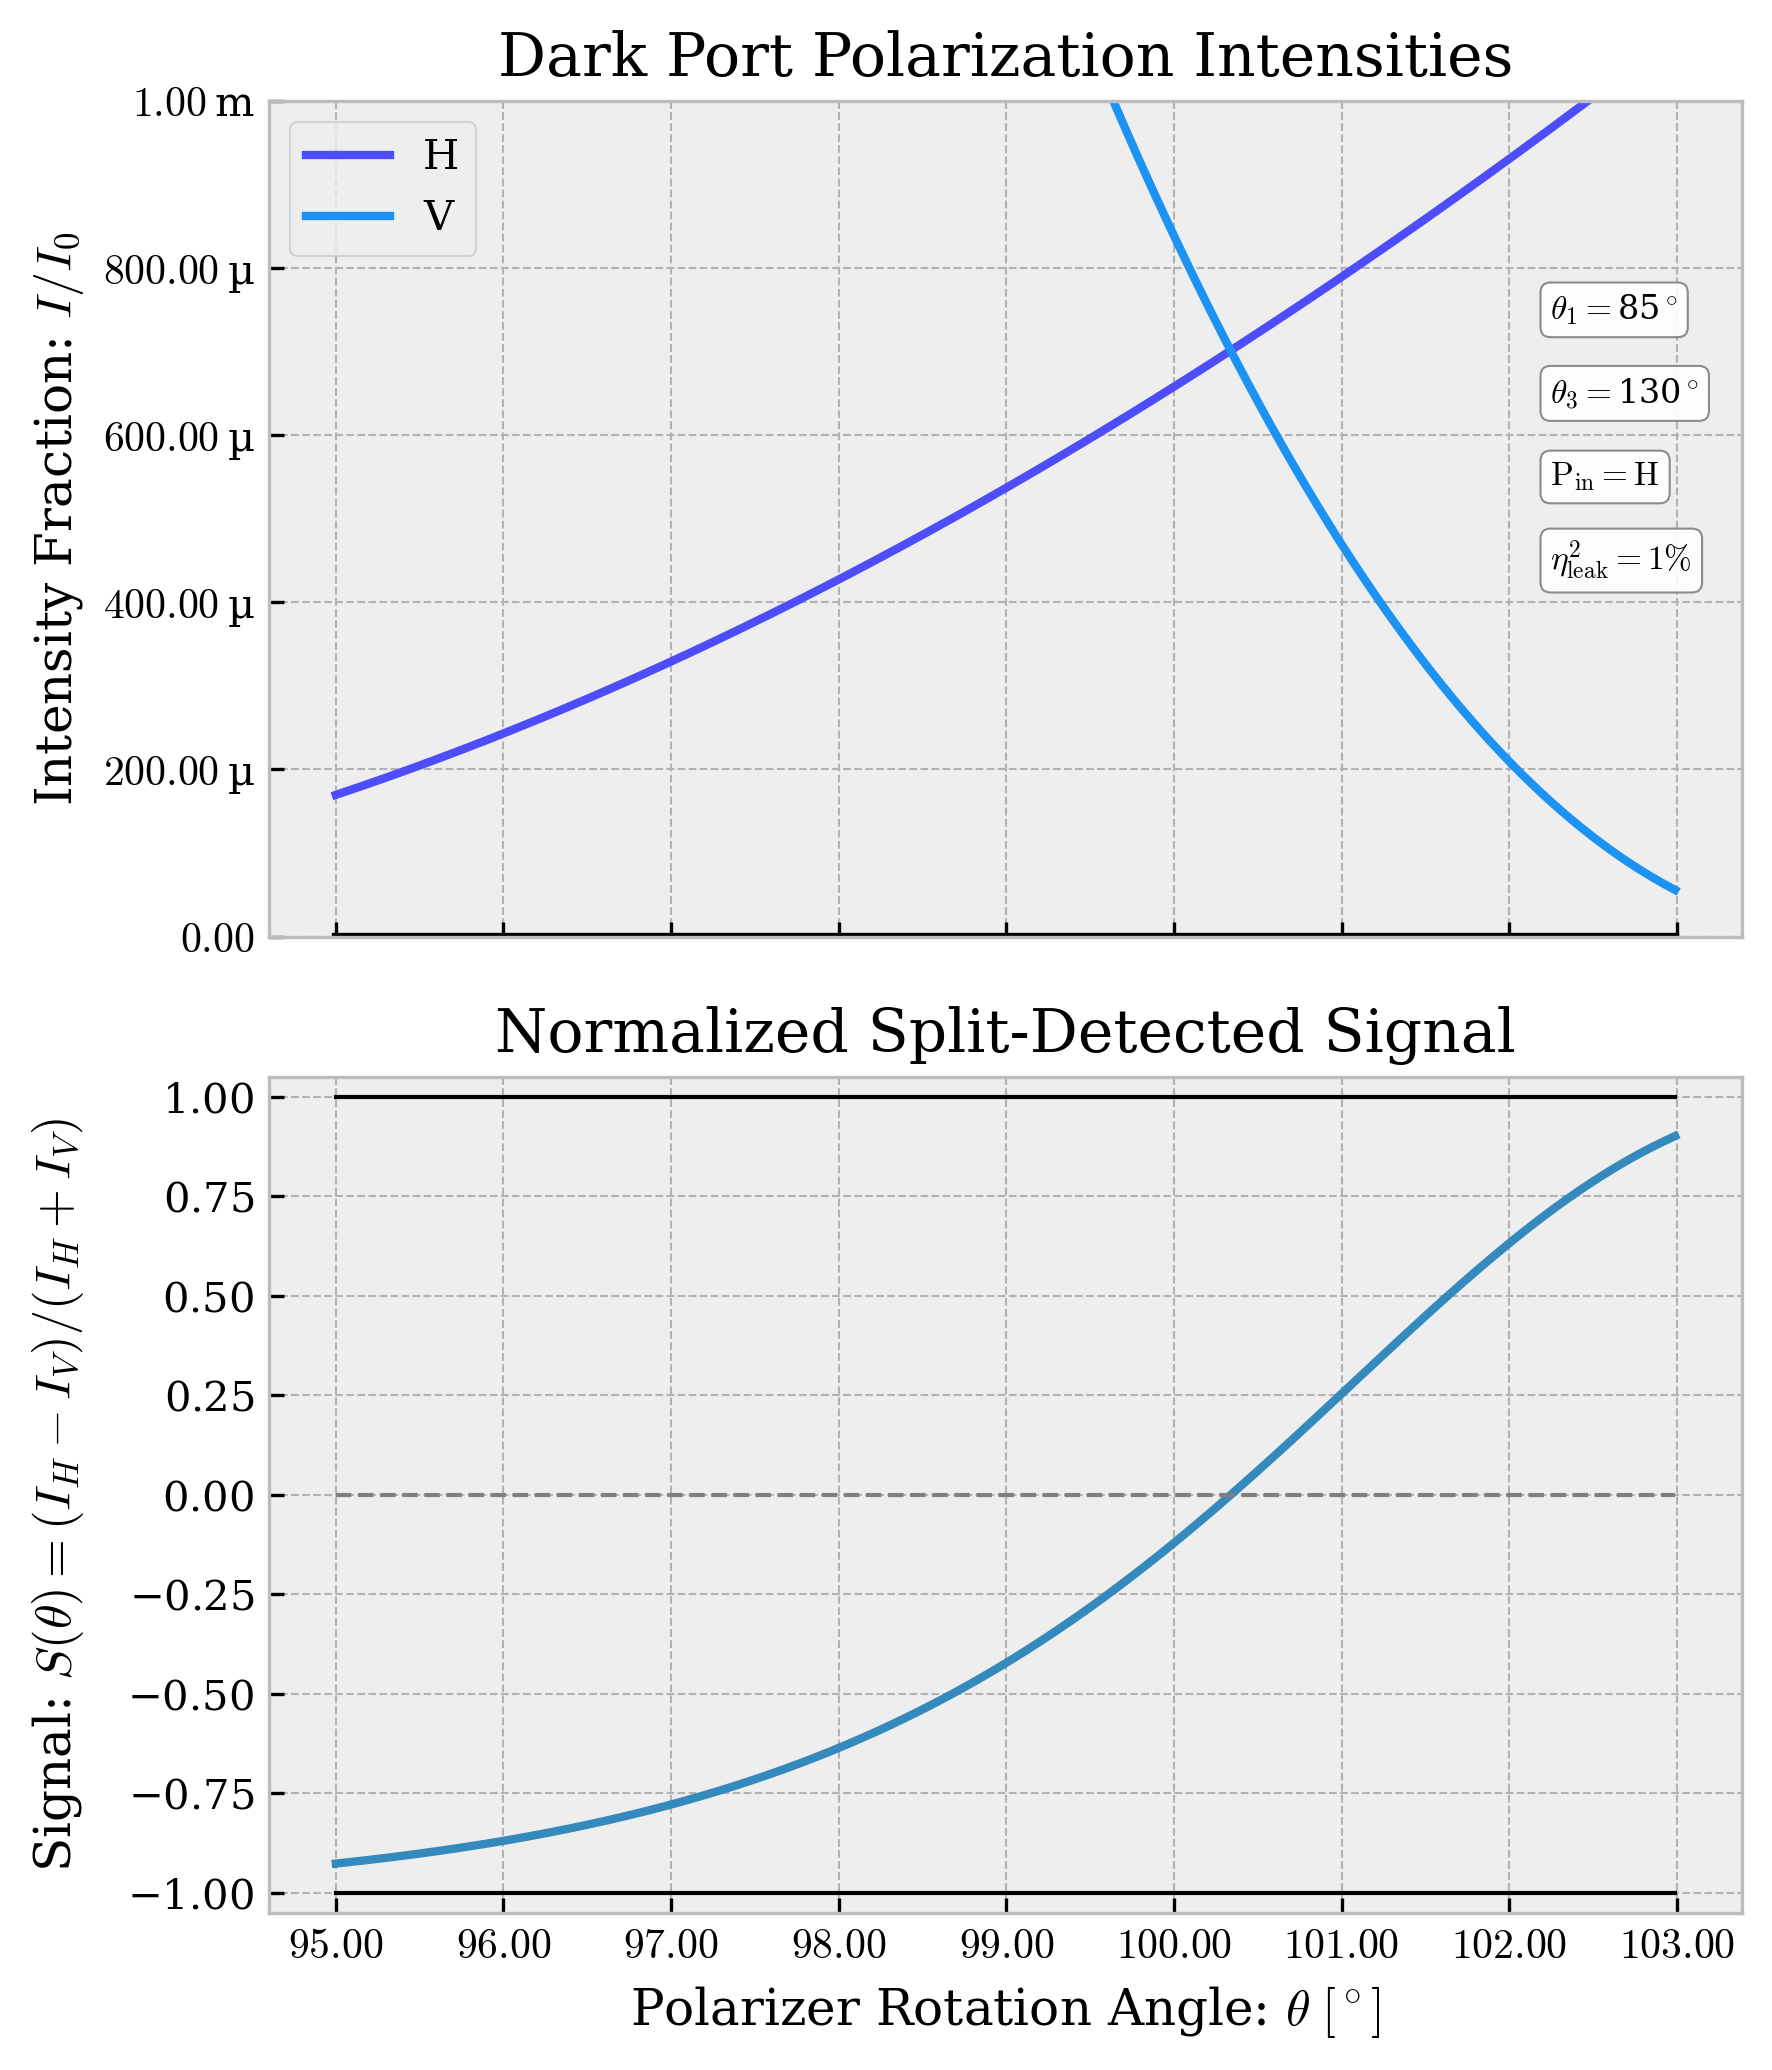

In [6]:
make_plots(85,130,95,103,ymax=0.001)

## Sharpening the Curve

The zeroes can be walked closer to each other by dialing the half-wave plate angles. In this case, the first HWP that was at 85 degrees is being walked up to just above 90 degrees while leaving the other at a constant 130 degrees.

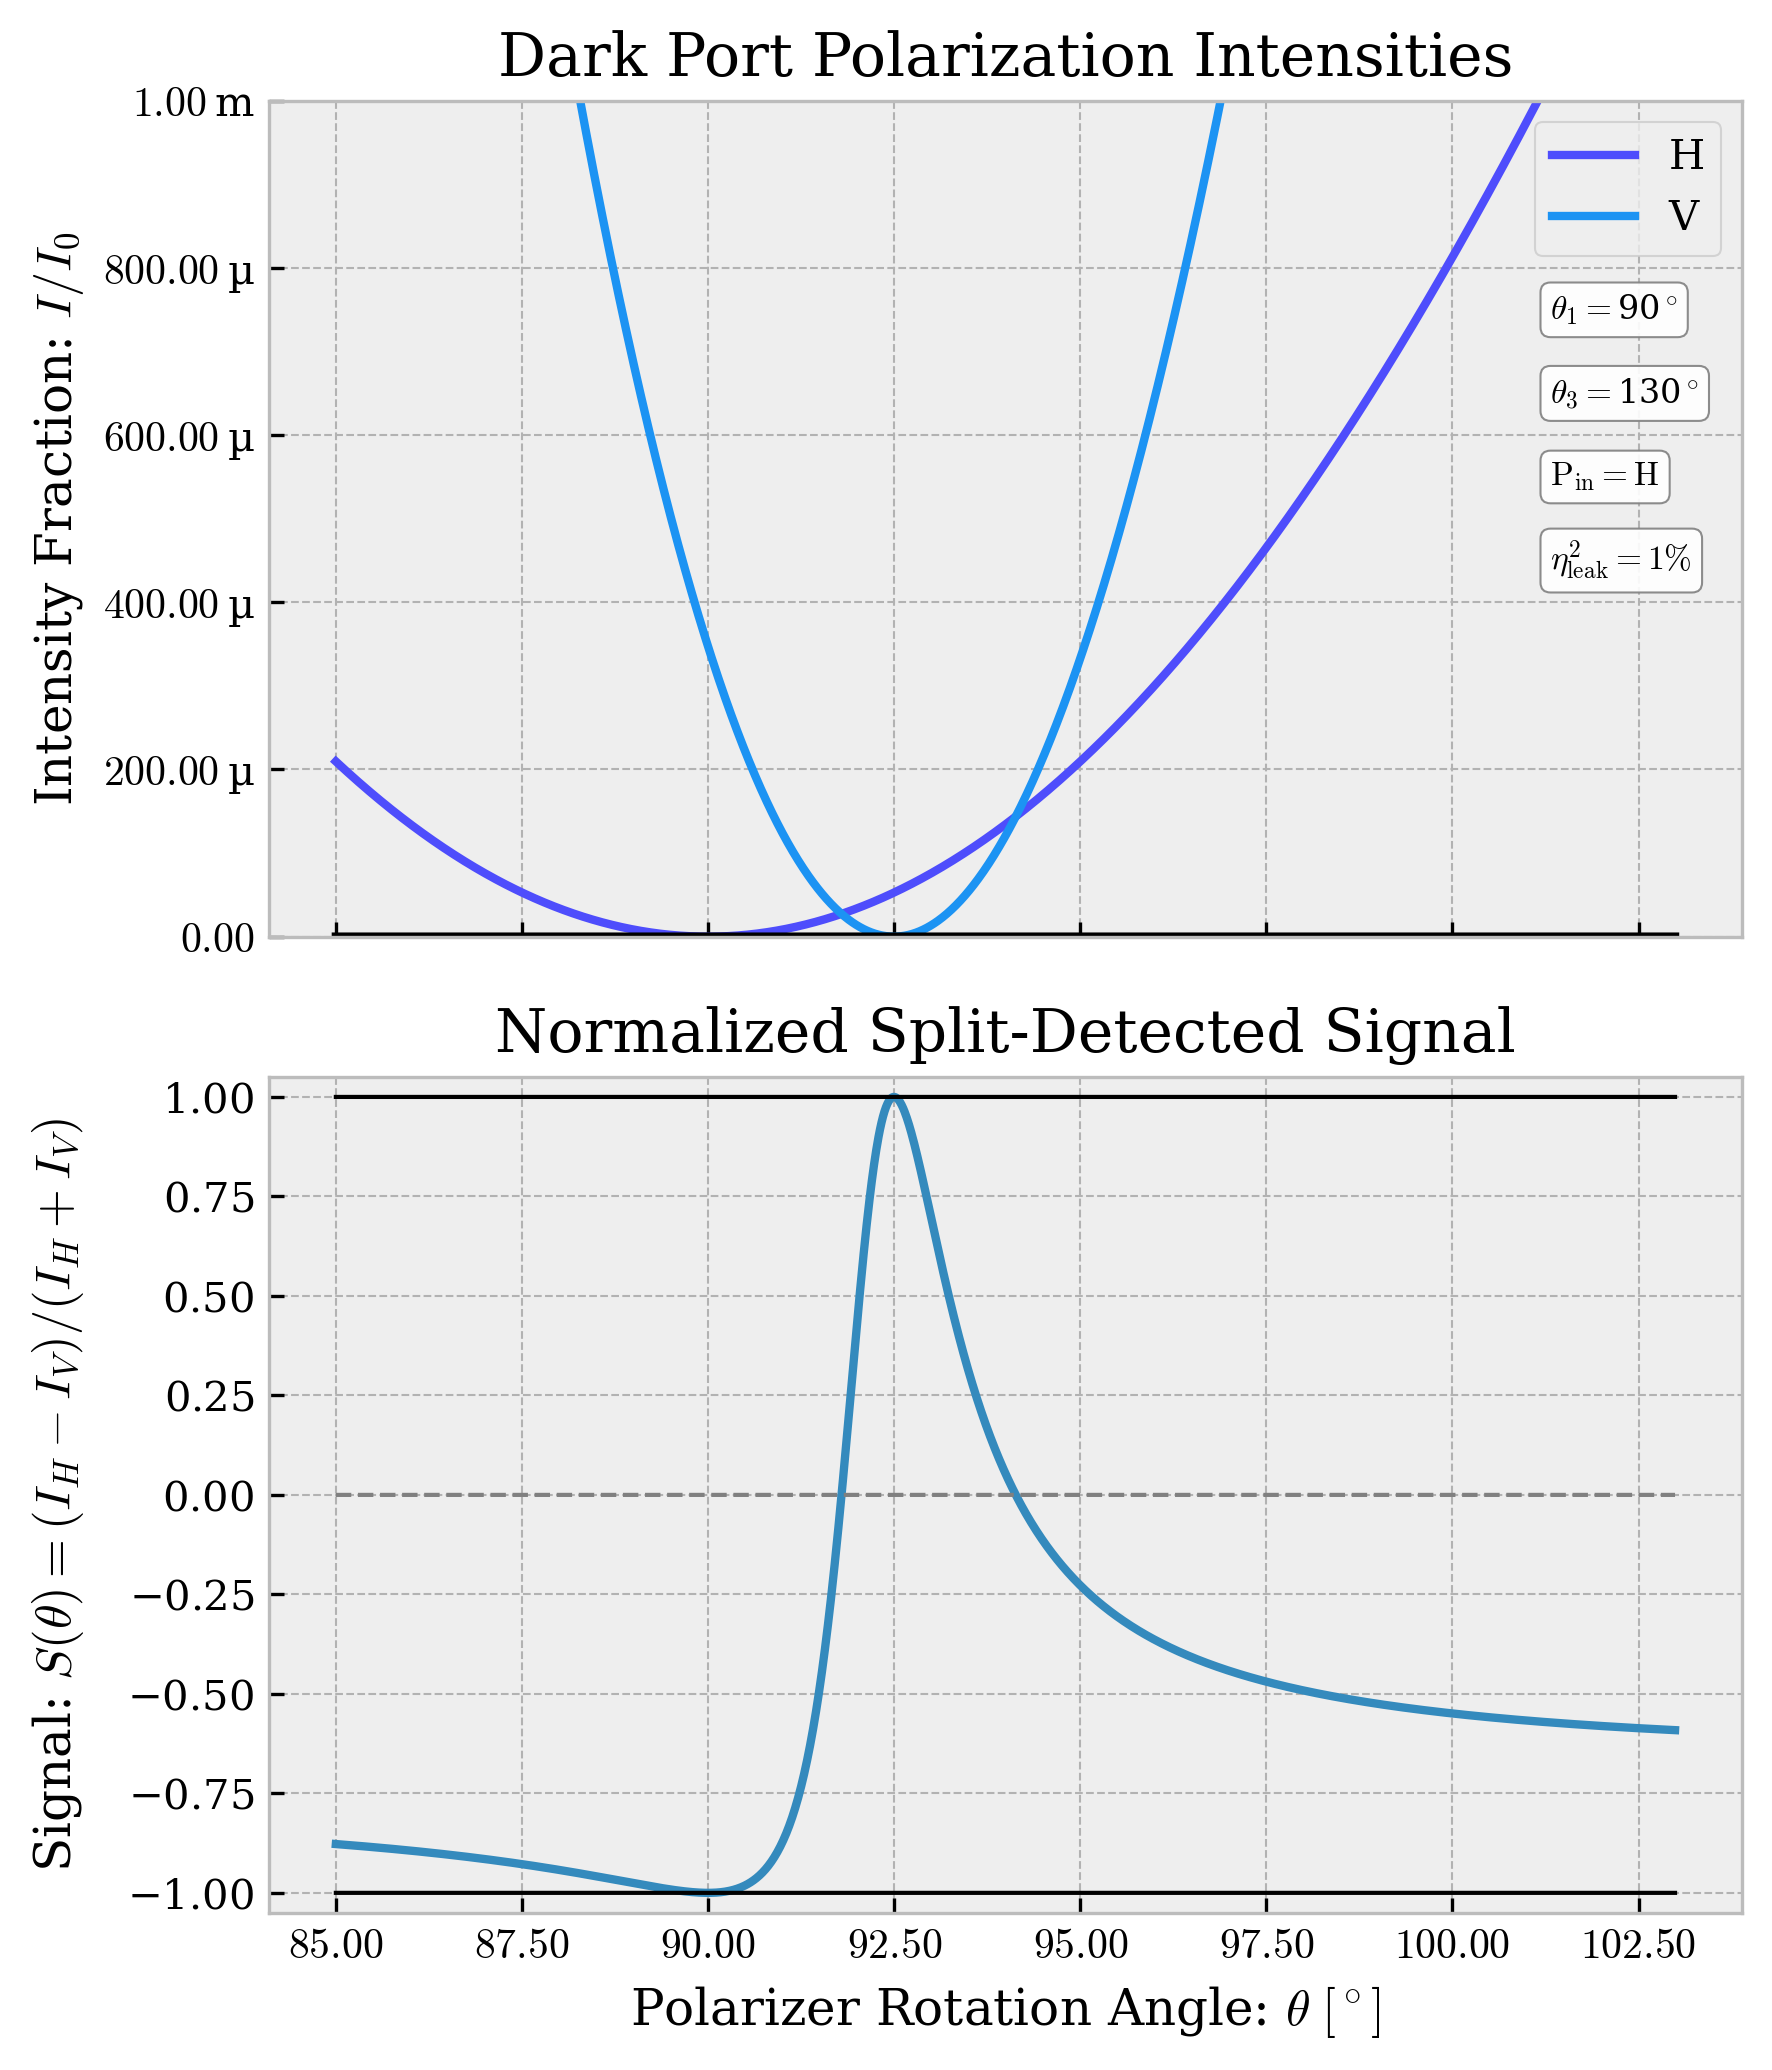

In [7]:
make_plots(90,130,85,103,ymax=0.001)

By an angle of 90.6 degrees, the two peaks are close enough together to produce a ramp of the full signal extent over an angular range of only half a degree. The total attenuation of the input beam at each detector is around $10^5$ to achieve this slope.

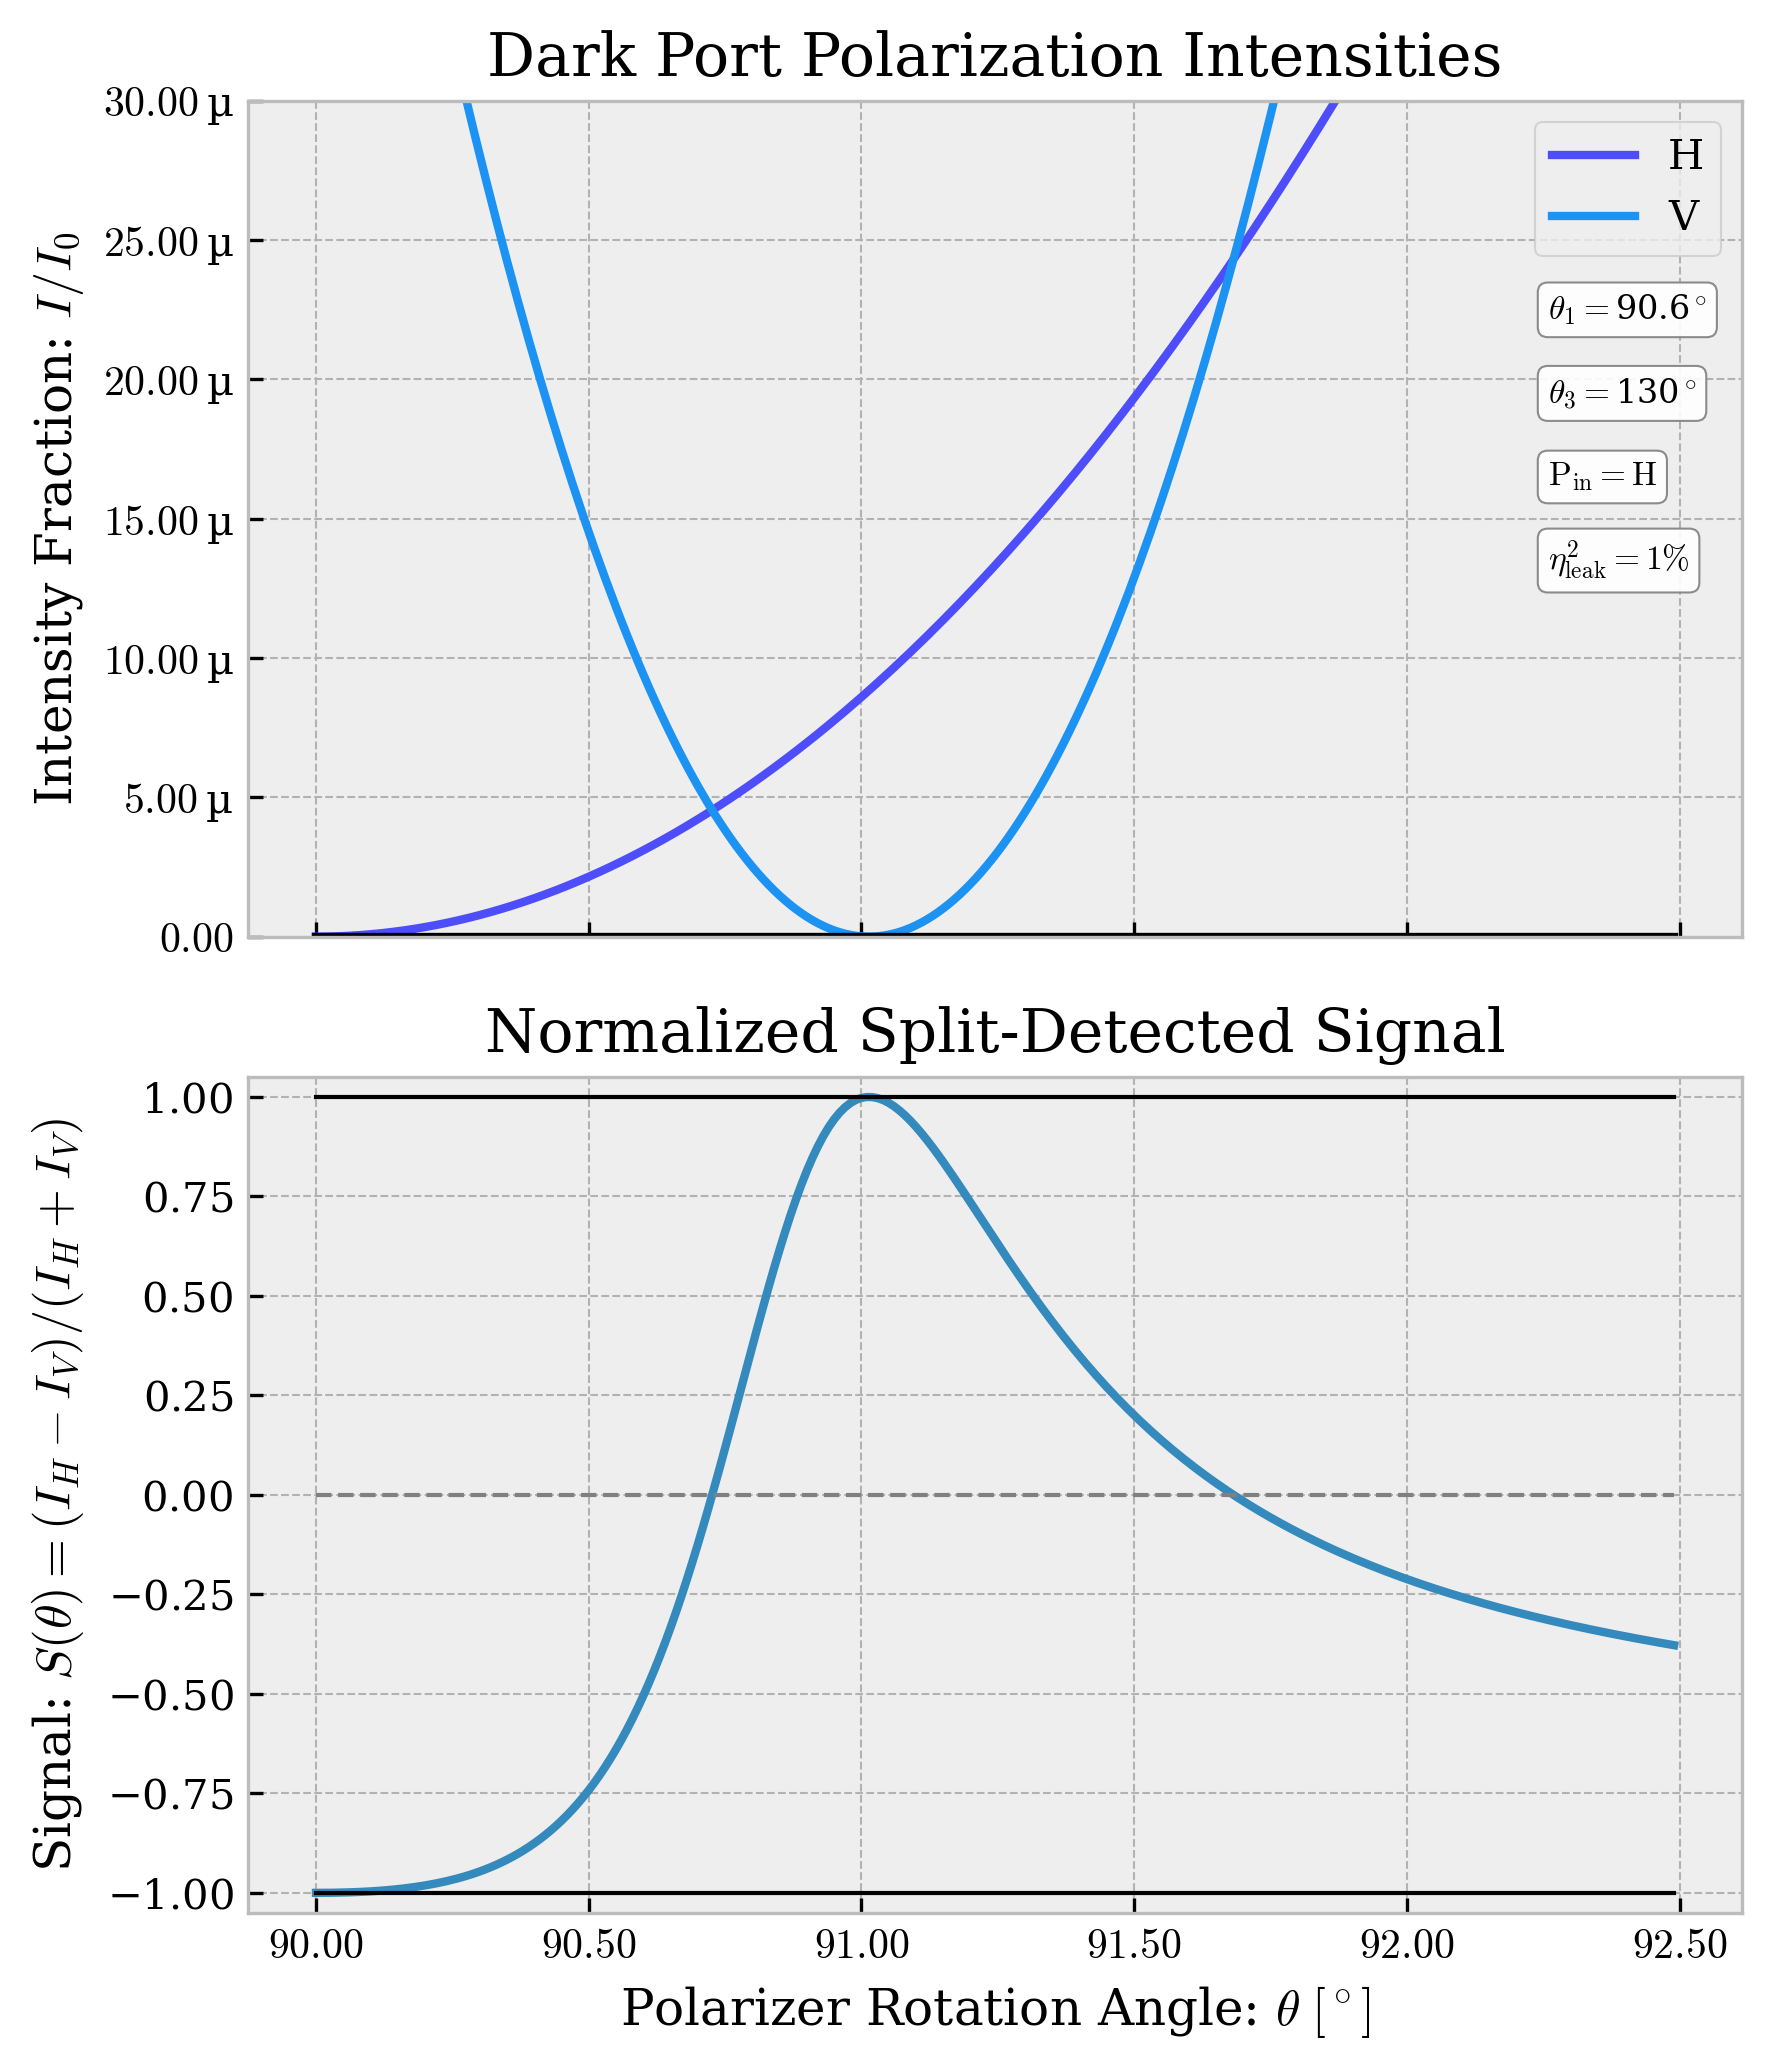

In [8]:
make_plots(90.6,130,90,92.5,ymax=0.00003)

# 1 and 3 - zero position

In [ ]:
make_plots(0,0.001,0,360)

In [ ]:
make_plots(45,45,0,360)

## Taking gradient

In [48]:
t1 = 80
t3 = 135
t2min = 0
t2max = 360

In [49]:
# Dark-port polarization intensities
t2s, h = ir.intensity(t1,t3,0,t2min,t2max)
_  , v = ir.intensity(t1,t3,90,t2min,t2max)

# Split-detected signal
s = (h - v)/(h + v)

In [50]:
def gradient(x):
    n=len(x)
    d = np.eye(n,n,1)-np.eye(n,n,-1)
    d[0][0:2]=np.array([[-2,2]])
    d[n-1,n-2:n]=np.array([[-2,2]])
    D=d/(2*(max(x)-min(x))/(len(x)-1))
    return D

def graph(fx, domain):
    yDeriv = gradient(domain)@fx
    yFunc = fx
    xpoints = domain
    
    f = plt.figure(figsize=(8,8))
    a = plt.axes()
    # Explicitly plot matched pairs of x-y points on the axis a
    a.plot(xpoints, yFunc, label="f(x)")
    # Explicitly plot different matched pair of x-y points in a different color
    a.plot(xpoints, yDeriv, color="Red", label="$f^ {'}(x)$")
    # Explicitly set axis labels and a plot title
    a.set(xlabel="Domain", ylabel="Range", title="Derivative Approximation")
    # Add a legend describing which curve is which
    a.legend()
    # Show the active plot to the screen
    plt.show()

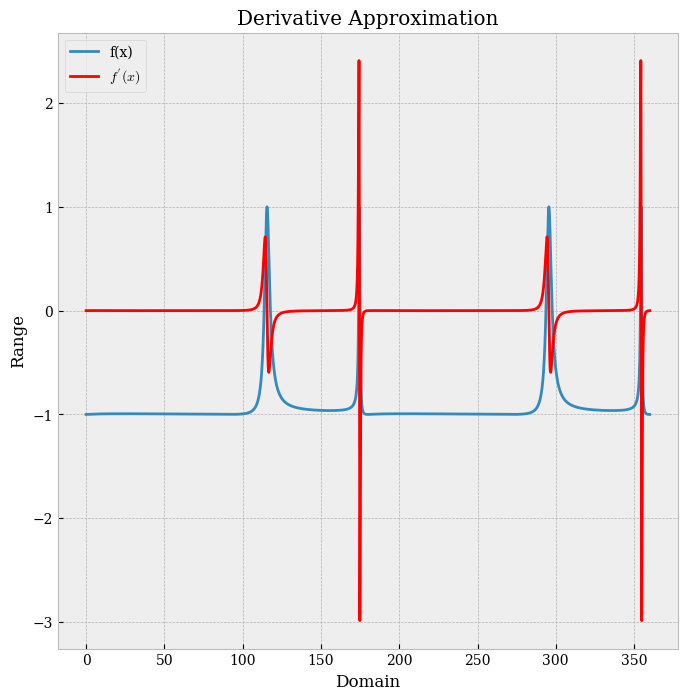

In [53]:
graph(s, t2s)

In [54]:
grads = np.gradient(t2s) # not working properly

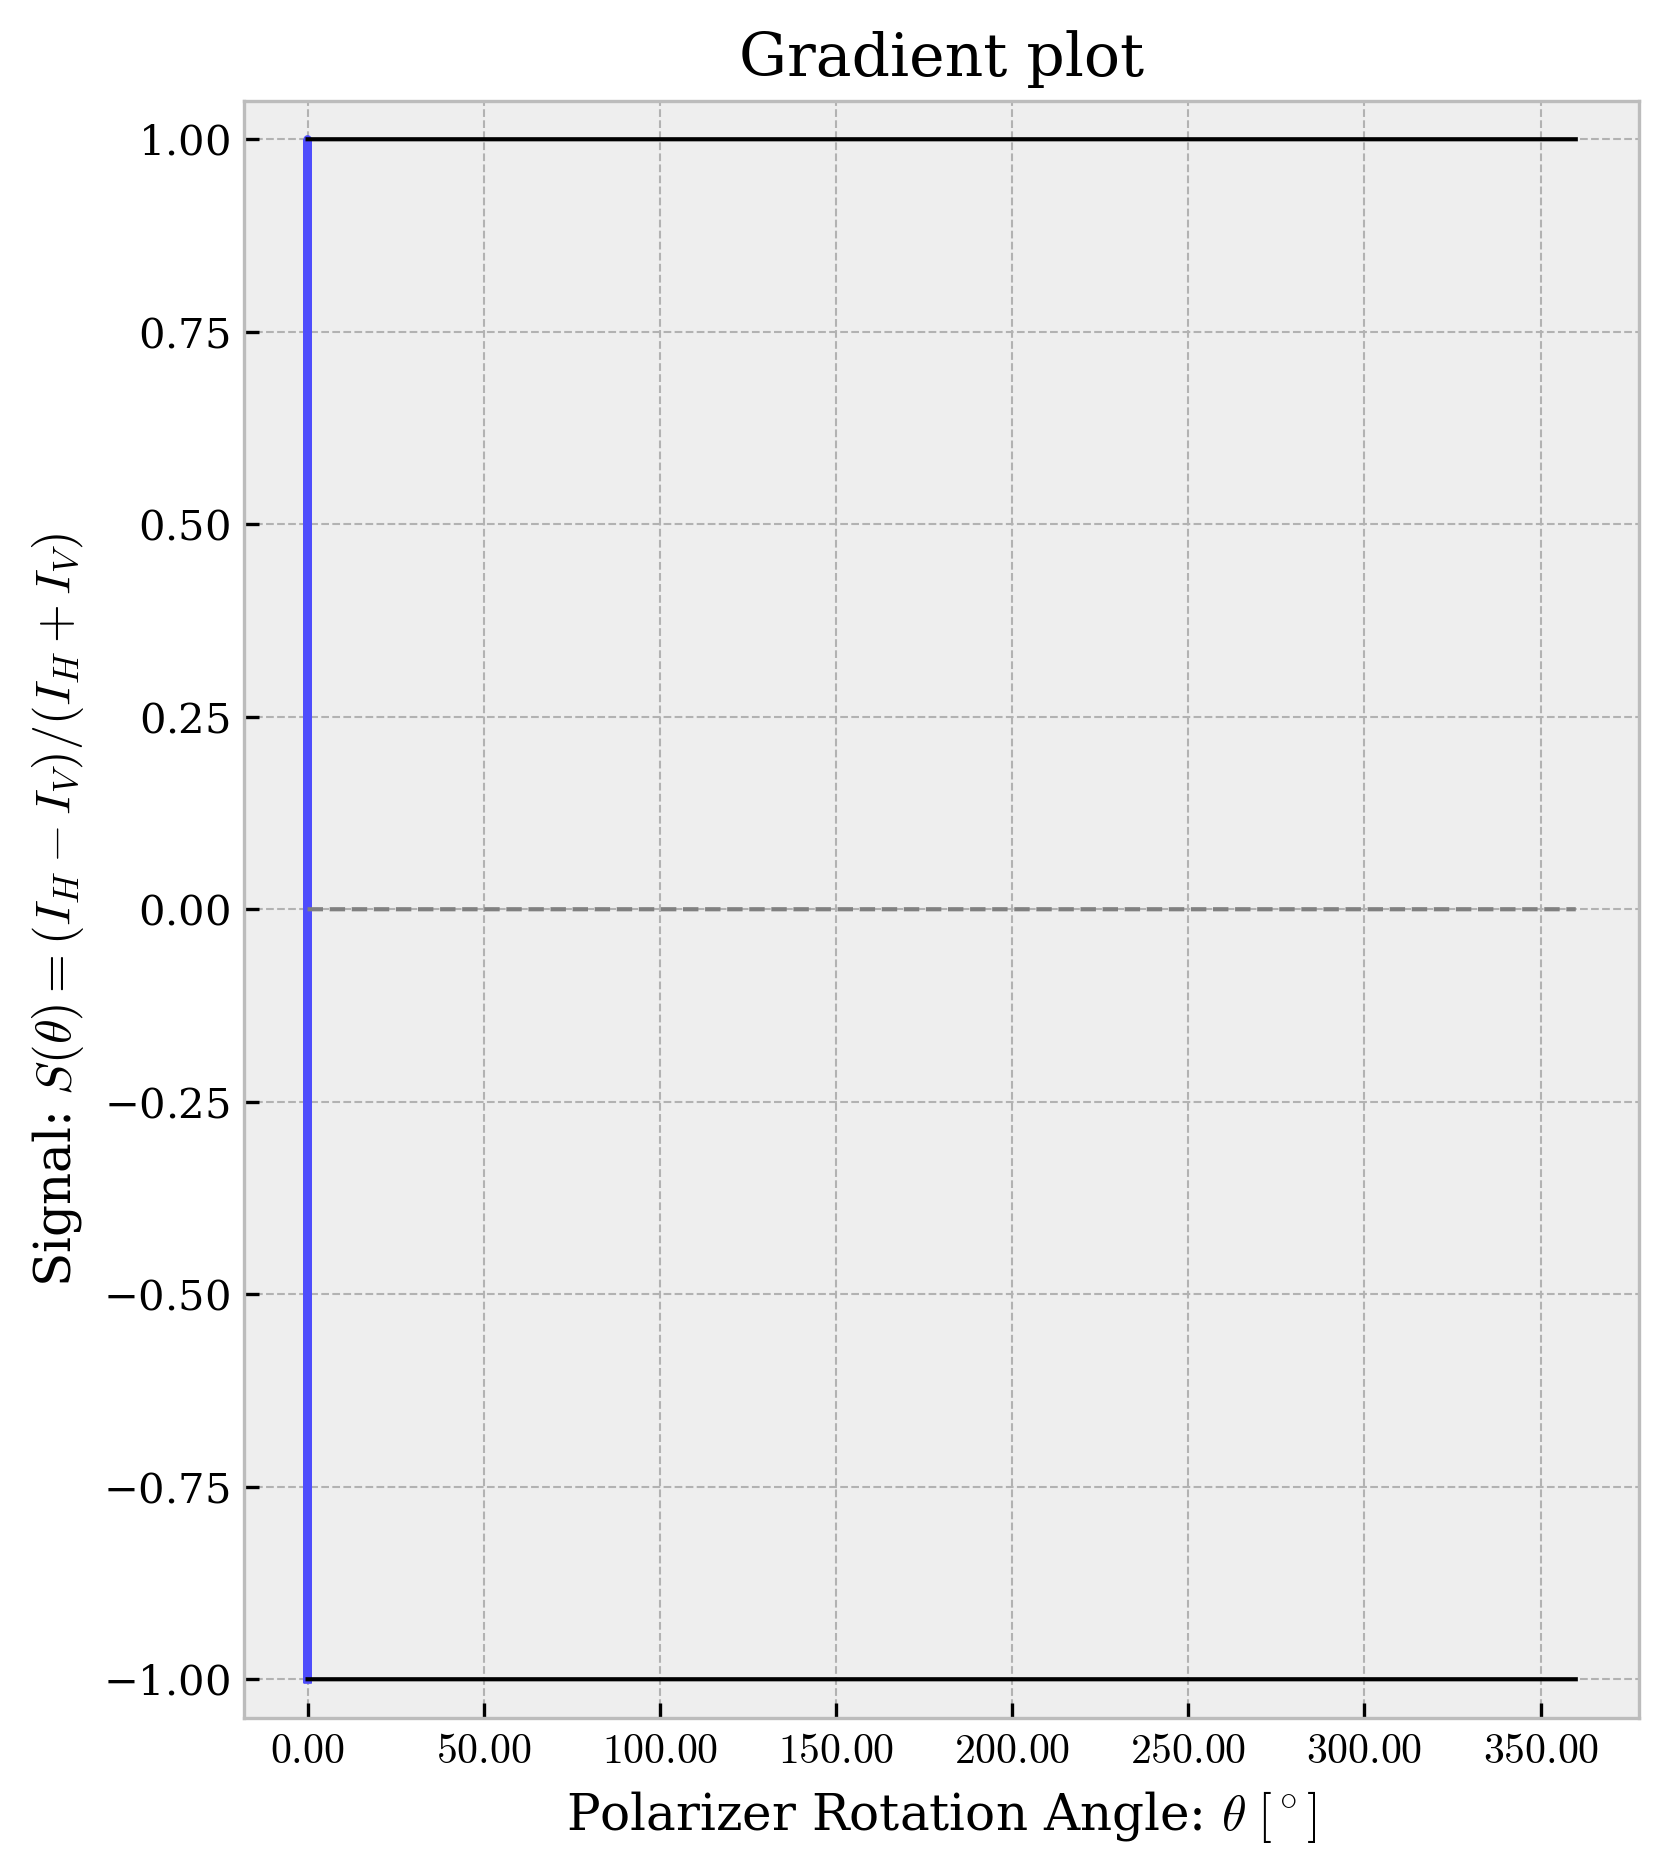

In [55]:
# Set up plot axes
fig, axes = plt.subplots(1, sharex=True, figsize=(6,7), dpi=300)
plt.rc('font', family='serif')
axes.set_prop_cycle(ccycle)
    
# (split-detection)
axes.plot(grad, s)
# include reference horizontal lines
axes.plot(t2s, np.zeros_like(t2s), color="gray", linestyle="--", linewidth=1)
axes.plot(t2s, np.ones_like(t2s), color="black", linewidth=1)
axes.plot(t2s, -np.ones_like(t2s), color="black", linewidth=1)
axes.grid(True)
axes.set_title("Gradient plot")
axes.set_xlabel(r"Polarizer Rotation Angle: $\theta\;[^\circ]$")
axes.set_ylabel(r"Signal: $S(\theta) = (I_H - I_V)/(I_H + I_V)$")
# Format label ticks nicely
formatter1 = EngFormatter(places=2, sep="", useMathText=True, unit="")
formatter2 = ScalarFormatter(useMathText=True)
axes.xaxis.set_major_formatter(formatter1)
axes.yaxis.set_major_formatter(formatter2)
axes.set_ylim(-1.05,1.05)
plt.show()

In [56]:
# function to return key for any value
def get_key(val):
    for key, value in my_dict.items():
         if val == value:
            return key
 
    return "key doesn't exist"

In [ ]:
max_slope = {}
for i in x:
    for j in x:
        # Dark-port polarization intensities
        t2s, h = ir.intensity(i,j,0,0,360)
        _  , v = ir.intensity(i,j,90,0,360)

        # Split-detected signal
        s = (h - v)/(h + v)
        
        dif = np.argmax(t2s[:-1] - t2s[1:])
        max_slope[(i,j)]=[dif]
        

<ipython-input-57-36005b71861d>:9: RuntimeWarning: invalid value encountered in true_divide
  s = (h - v)/(h + v)


In [ ]:
max_key = max(max_slope, key=max_slope.get)
max_value = max(max_slope)
max_key = get_key(max_value)

Take points where it changes sign - each chunk where it changes sign find the max slope in that region. Max absolute value